Step 1: Face detection

In [4]:
IMAGE_PATH = "Nhut_real.jpg"
DB_PATH = "Storage"

In [53]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepface.modules import preprocessing, modeling, verification
from deepface.models.FacialRecognition import FacialRecognition 
import numpy as np
from utils import face_detect, resize_image


In [24]:
aligned_img, rotated_x1, rotated_y1, rotated_x2, rotated_y2 = face_detect(IMAGE_PATH)

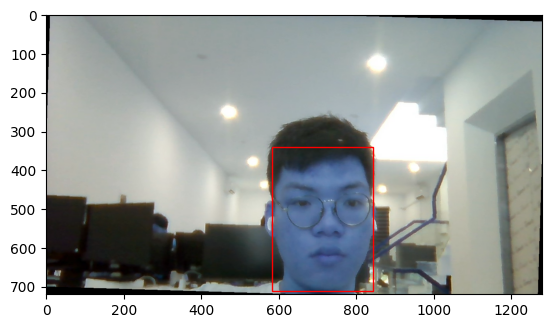

In [25]:
# aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(aligned_img)
rect = patches.Rectangle((rotated_x1, rotated_y1), rotated_x2 - rotated_x1, rotated_y2 - rotated_y1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

Step 2: Preprocess 

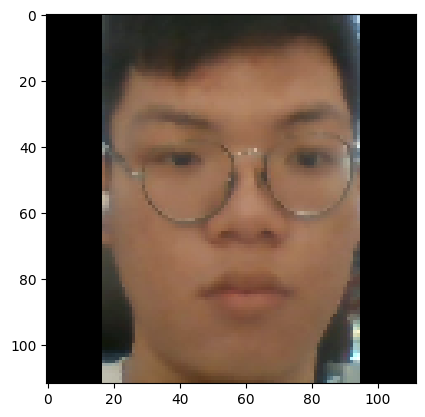

In [28]:
source_face = aligned_img[
            int(rotated_y1): int(rotated_y2),
            int(rotated_x1): int(rotated_x2)
        ]

source_img = source_face.squeeze()
source_img = source_img[:, :, ::-1]  # Convert BGR to RGB if necessary

        # Assuming 'resize_image' and 'preprocessing.normalize_input' are defined elsewhere
source_img = resize_image(source_img, (112, 112))
source_img = preprocessing.normalize_input(img=source_img, normalization='base')
plt.imshow(source_img.squeeze())

Step 3: Vectorize 


In [35]:
model: FacialRecognition = modeling.build_model('ArcFace')
source_emb = model.find_embeddings(source_img)
source_emb = np.array(source_emb)

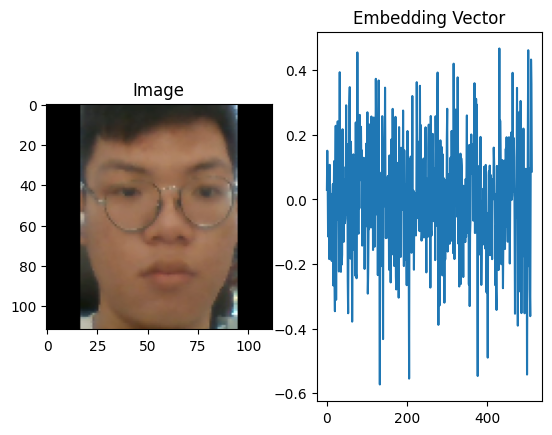

In [55]:
import matplotlib.pyplot as plt

# Visualize the image
plt.subplot(1, 2, 1)
plt.imshow(source_img.squeeze())
plt.title('Image')

# Visualize the embedding vector using a line plot
plt.subplot(1, 2, 2)
plt.plot(source_emb)
plt.title('Embedding Vector')

plt.show()


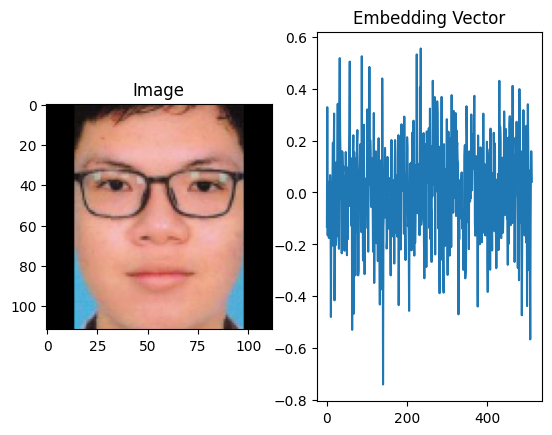

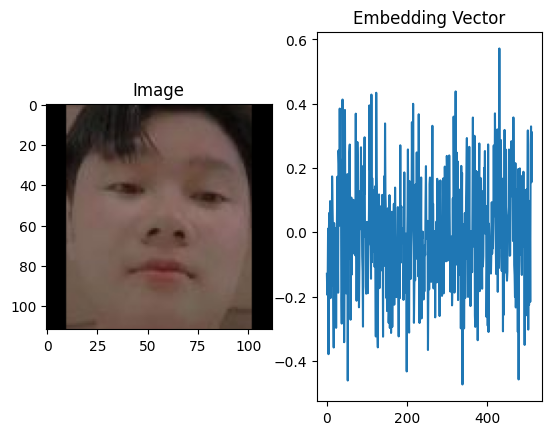

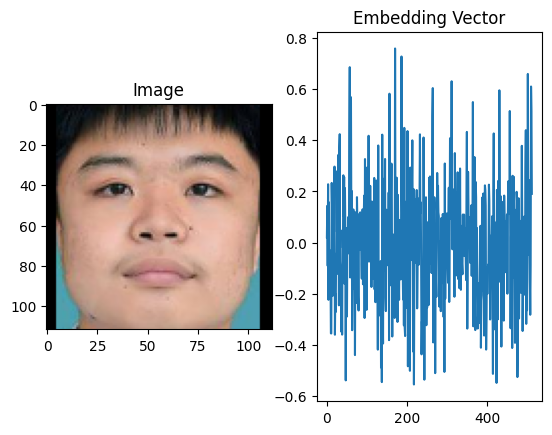

In [52]:
image_files = os.listdir(DB_PATH)
for image_file in image_files:
    # Load the image
    image_path = os.path.join(DB_PATH, image_file)
    aligned_img, rotated_x1, rotated_y1, rotated_x2, rotated_y2 = face_detect(image_path)
    source_face = aligned_img[
            int(rotated_y1): int(rotated_y2),
            int(rotated_x1): int(rotated_x2)
        ]

    img = source_face.squeeze()
    img = img[:, :, ::-1]  # Convert BGR to RGB if necessary

            # Assuming 'resize_image' and 'preprocessing.normalize_input' are defined elsewhere
    img = resize_image(img, (112, 112))
    img = preprocessing.normalize_input(img=img, normalization='base')
    
    # Convert image to RGB (if needed)
    
    # Find the embedding vector
    emb_vector = model.find_embeddings(img)
    emb_vector = np.array(emb_vector)
    
    # Visualize the img
    plt.subplot(1, 2, 1)
    plt.imshow(img.squeeze())
    plt.title('Image')
    
    # Visualize the embedding vector
    plt.subplot(1, 2, 2)
    plt.plot(emb_vector)
    plt.title('Embedding Vector')
    
    plt.show()
    
distance = verification.find_distance(emb_vec, emb_db, 'cosine')


Step 4: Find the closest embedding vector to the source embedding vector

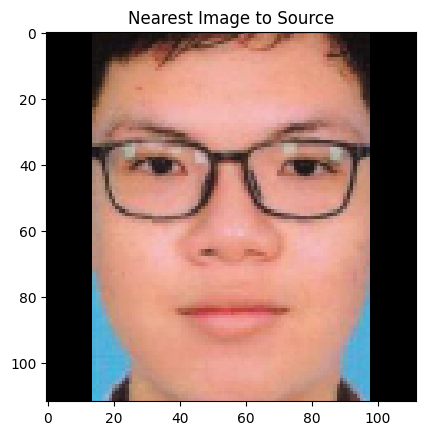

In [57]:
min_distance = float('inf')
nearest_image = None
image_files = os.listdir(DB_PATH)
for image_file in image_files:
    # Load the image
    image_path = os.path.join(DB_PATH, image_file)
    aligned_img, rotated_x1, rotated_y1, rotated_x2, rotated_y2 = face_detect(image_path)
    face = aligned_img[
            int(rotated_y1): int(rotated_y2),
            int(rotated_x1): int(rotated_x2)
        ]

    img = face.squeeze()
    img = img[:, :, ::-1]  # Convert BGR to RGB if necessary

            # Assuming 'resize_image' and 'preprocessing.normalize_input' are defined elsewhere
    img = resize_image(img, (112, 112))
    img = preprocessing.normalize_input(img=img, normalization='base')
    emb_vector = model.find_embeddings(img)
    emb_vector = np.array(emb_vector)
    distance = verification.find_distance(source_emb, emb_vector, 'cosine')
    
    # Update minimum distance and nearest image if needed
    if distance < min_distance:
        min_distance = distance
        nearest_image = img

# Visualize the nearest image
plt.imshow(nearest_image.squeeze())
plt.title('Nearest Image to Source')
plt.show()